# THE SPARKS FOUNDATION
## DATA SCIENCE AND BUSINESS ANALYTICS INTERNSHIP JAN21
### TASK 3: EXPLORATORY DATA ANALYSIS - RETAIL
#### QUESTION : Perform exploratory Data Analysis on the given dataset and as a business manager,try to find the weak areas where you can work to make more profit. Also, dervive all the business problems.
### Name: Chiranthana R R

## IMPORTING LIBRARIES

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

## READING DATASET

In [3]:
df = pd.read_csv('SampleSuperstore.csv')

In [4]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## DATA INSIGHTS



In [5]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [7]:
df.shape

(9994, 13)

In [8]:
df.isnull().sum() ##checking for duplicate values

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [9]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [10]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [11]:
avg_profit = df['Profit'].astype('float').mean()
print("The average is {}".format(avg_profit))

The average is 28.656896307784802


In [12]:
## total sales 
total_sales=df['Sales'].sum()
## total profit
total_profit=df['Profit'].sum()
print(total_sales)
print(total_profit)

2297200.8603
286397.0217


In [13]:
df['Profit'].max()

8399.976

In [14]:
loss=df['Profit']<avg_profit
loss.sum()

7443

In [15]:
Top_10_Sales = df.groupby("State").Sales.sum().nlargest(n =10)
Top_10_Profits = df.groupby("State").Profit.sum().nlargest(n =10)

In [16]:
Top_10_Sales

State
California      457687.6315
New York        310876.2710
Texas           170188.0458
Washington      138641.2700
Pennsylvania    116511.9140
Florida          89473.7080
Illinois         80166.1010
Ohio             78258.1360
Michigan         76269.6140
Virginia         70636.7200
Name: Sales, dtype: float64

In [17]:
Top_10_Profits

State
California    76381.3871
New York      74038.5486
Washington    33402.6517
Michigan      24463.1876
Virginia      18597.9504
Indiana       18382.9363
Georgia       16250.0433
Kentucky      11199.6966
Minnesota     10823.1874
Delaware       9977.3748
Name: Profit, dtype: float64

### visualising top sales and profits

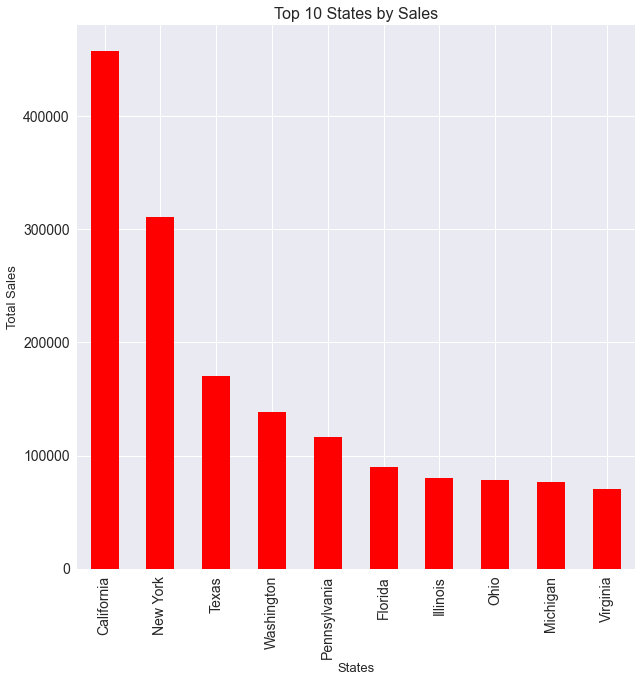

In [18]:
plt.style.use('seaborn')
Top_10_Sales.plot(kind ='bar', figsize =(10,10), fontsize =14,color= 'red')
plt.xlabel("States", fontsize =13)
plt.ylabel("Total Sales",fontsize =13)
plt.title("Top 10 States by Sales",fontsize =16)
plt.show()


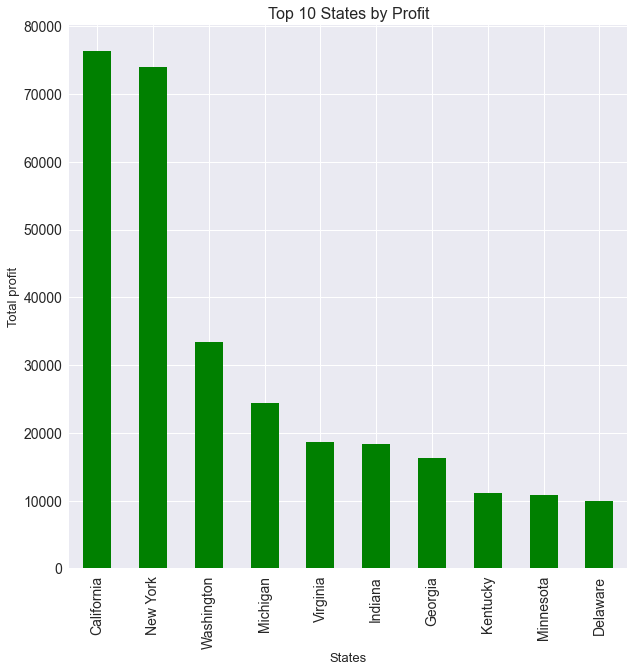

In [19]:
plt.style.use('seaborn')
Top_10_Profits.plot(kind ='bar', figsize =(10,10), fontsize =14,color='green')
plt.xlabel("States", fontsize =13)
plt.ylabel("Total profit",fontsize =13)
plt.title("Top 10 States by Profit",fontsize =16)
plt.show()

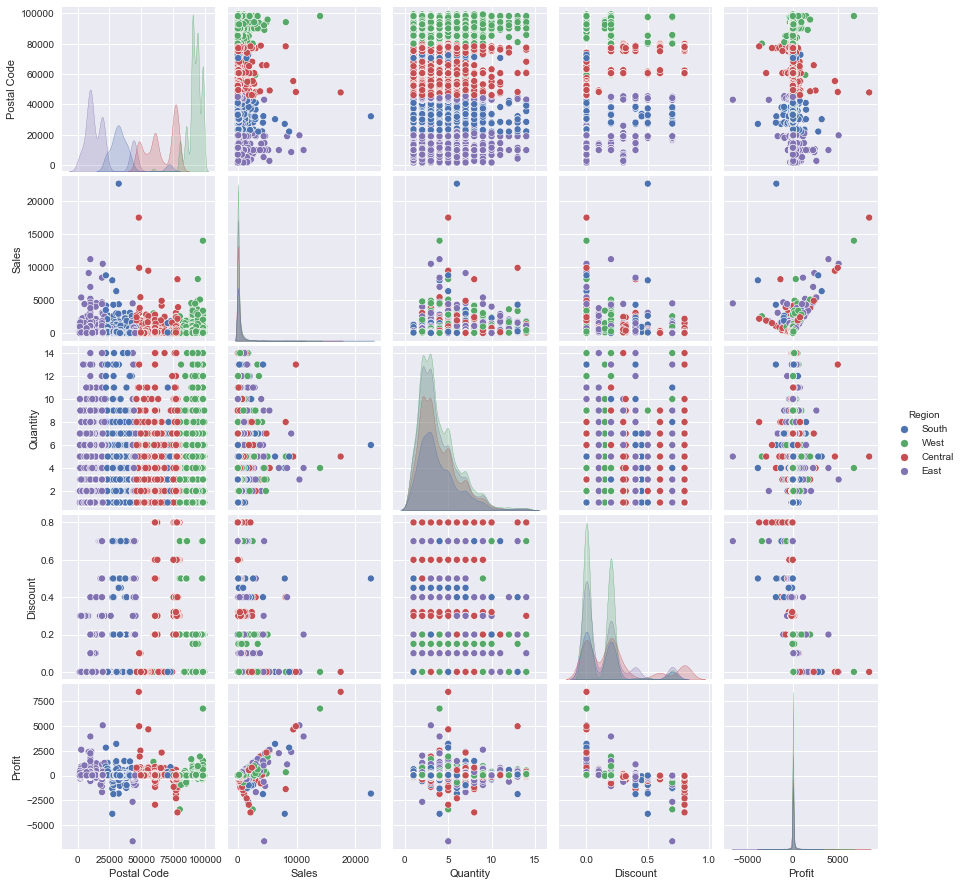

In [20]:
sns.pairplot(df,hue='Region')

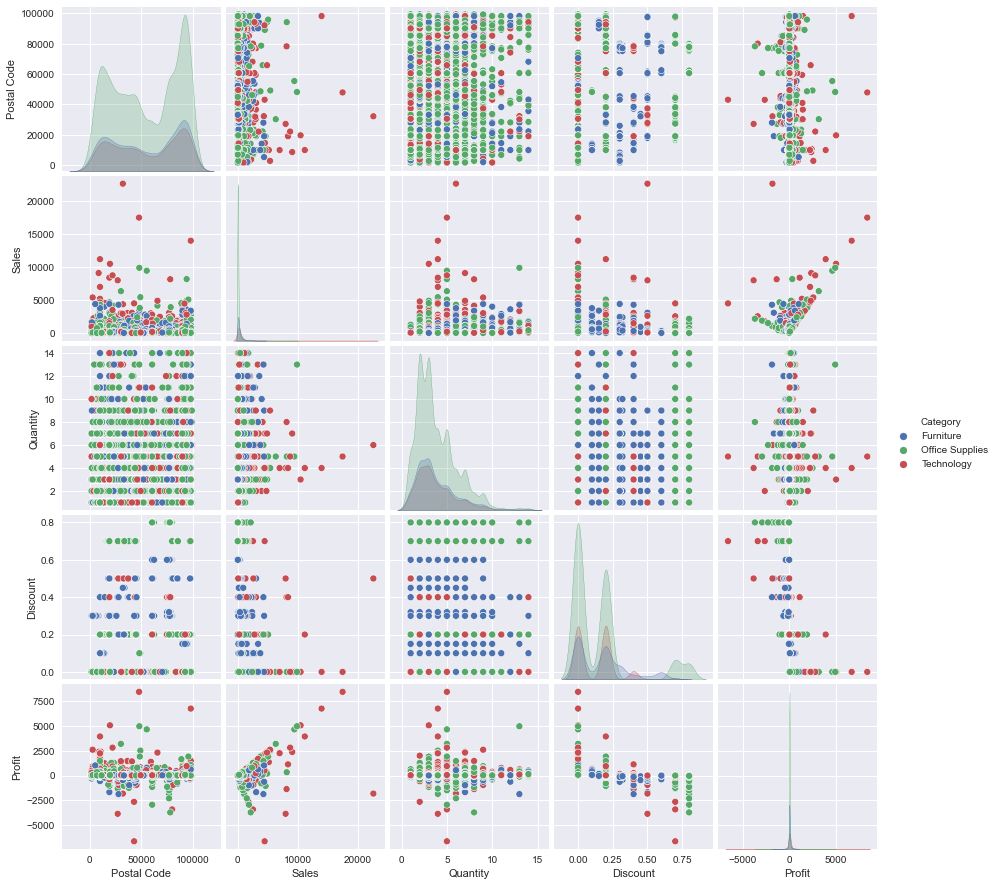

In [21]:
sns.pairplot(df,hue='Category')

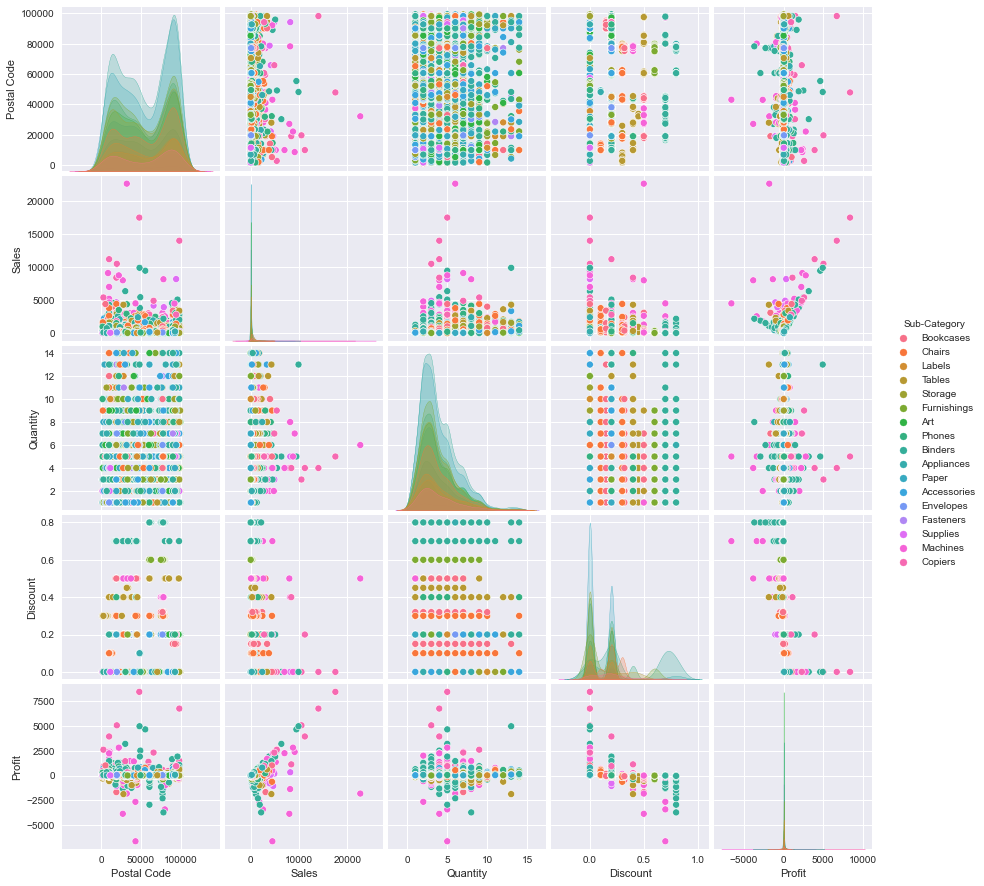

In [22]:
sns.pairplot(df,hue='Sub-Category')

<AxesSubplot:>

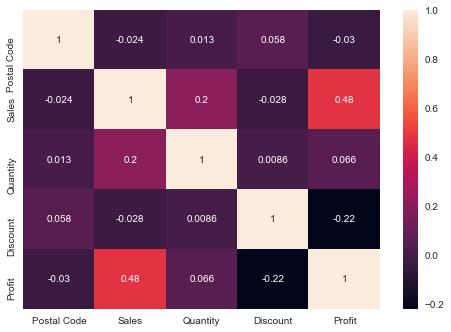

In [23]:
sns.heatmap(df.corr(), annot = True)

<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

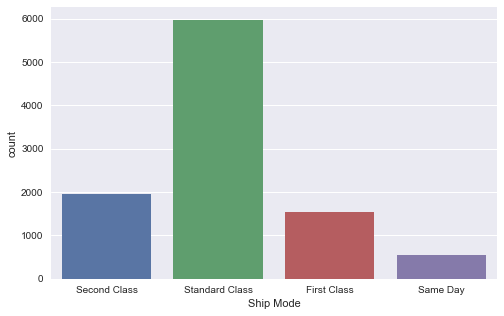

In [29]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['Ship Mode'])

C:\Users\chiranthana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


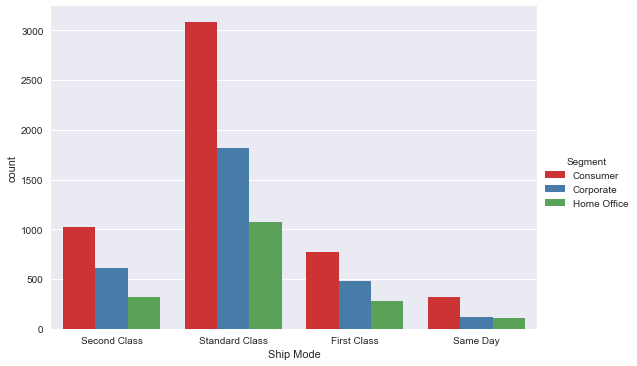

In [30]:
sns.catplot("Ship Mode", hue="Segment", data=df, kind="count", aspect=1.5, palette="Set1")

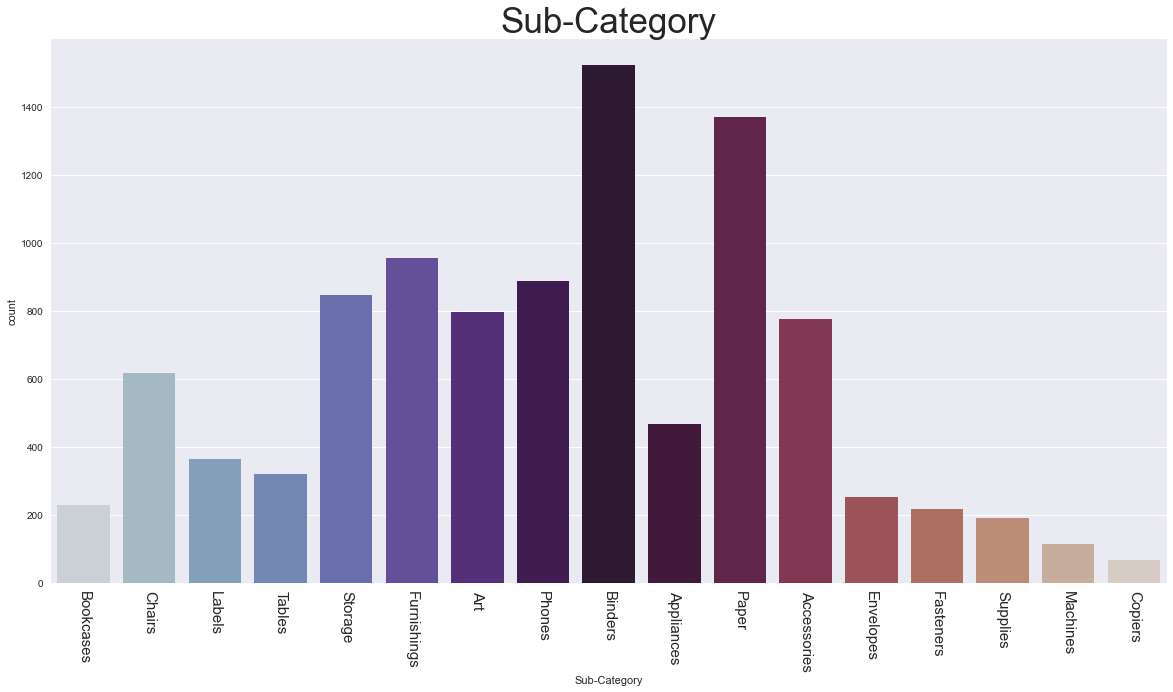

In [35]:
plt.figure(figsize=(20,10))
sns.countplot(x=df["Sub-Category"],palette='twilight')

plt.title('Sub-Category', fontsize=35)
plt.xticks(rotation = 270, fontsize=15)

plt.show()

C:\Users\chiranthana\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Sales per Category and Sub-Category')

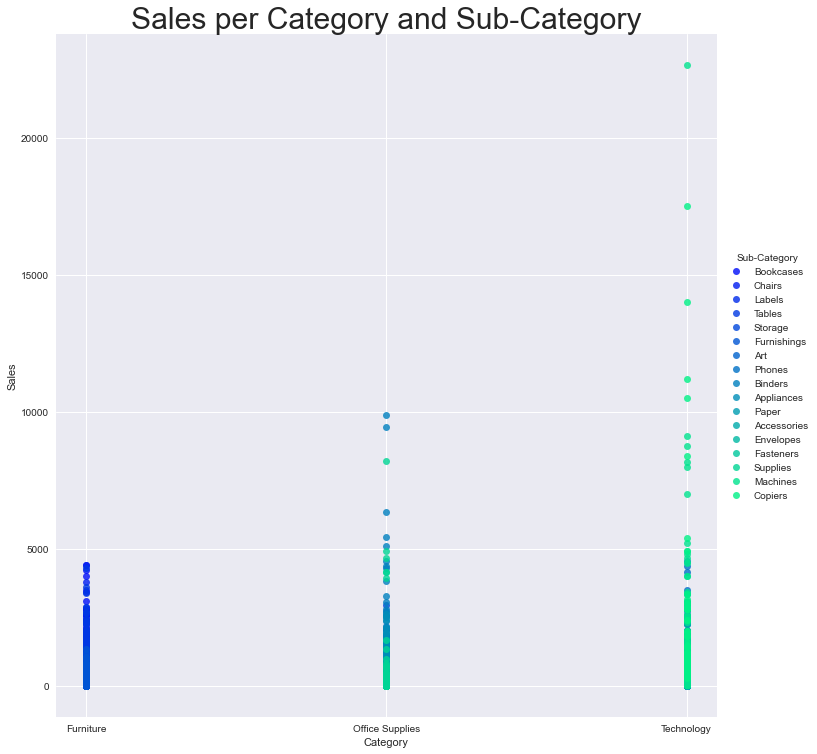

In [39]:
sns.lmplot(x='Category',y='Sales',data=df,fit_reg=False,hue='Sub-Category',legend=True,palette='winter',size=10)
plt.title("Sales per Category and Sub-Category",fontsize=30)

<ipython-input-41-1608acb686b7>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  shipmode1=df.groupby(['Ship Mode'])['Sales','Discount','Profit'].sum()


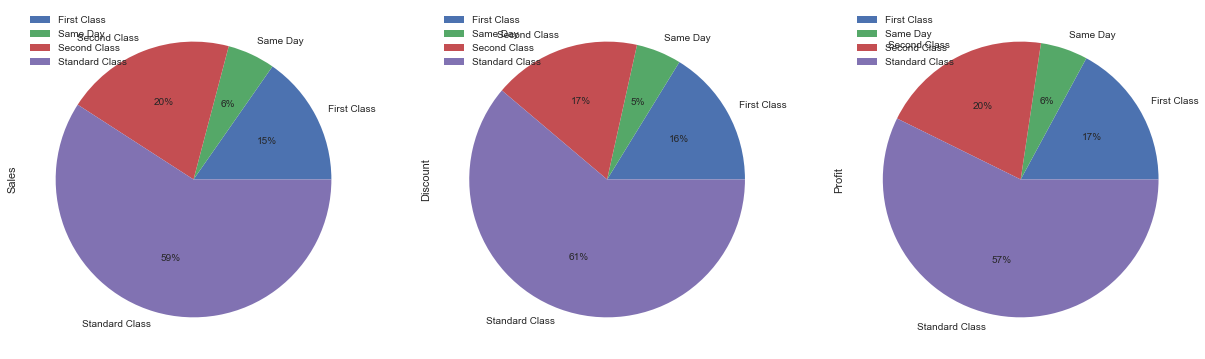

In [41]:
shipmode1=df.groupby(['Ship Mode'])['Sales','Discount','Profit'].sum()
shipmode1.plot.pie(autopct='%1.lf%%', label=shipmode1.index,subplots=True,figsize=(21,10))
plt.show()

<ipython-input-44-946991c650df>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sales_profit=df.groupby(['Sub-Category'])['Profit','Sales'].agg(['sum'])


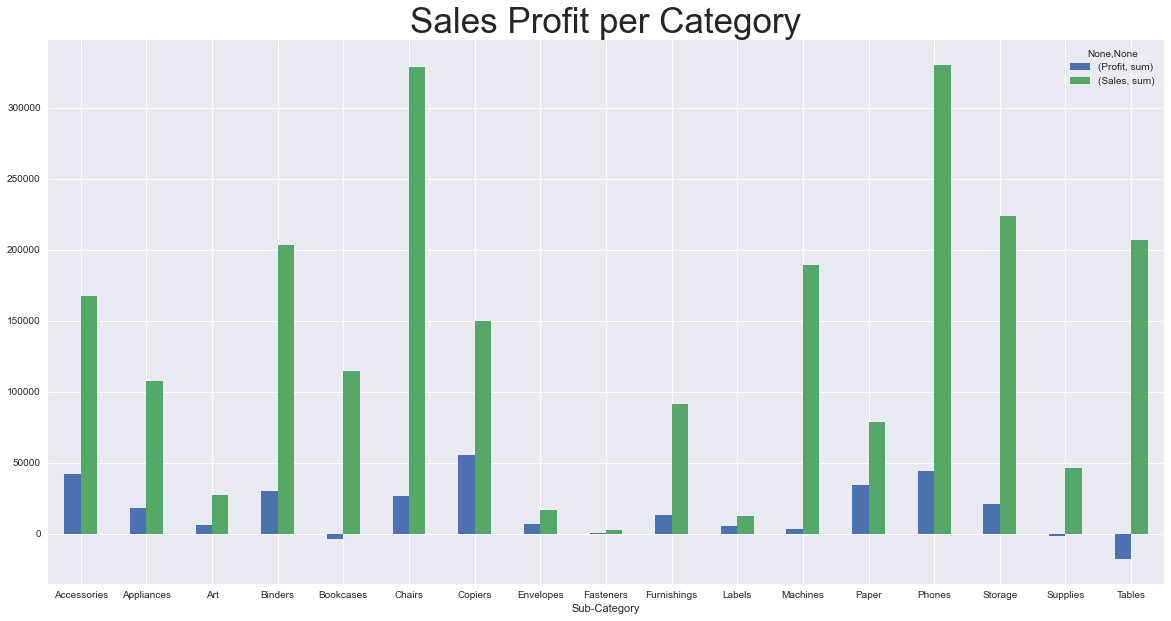

In [44]:
#statewise graph plot
sales_profit=df.groupby(['Sub-Category'])['Profit','Sales'].agg(['sum'])
sales_profit.plot.bar(rot=0,figsize=(20,10))

plt.title('Sales Profit per Category',fontsize=35)
plt.show(block=True)

## CONCLUSIONS DRAWN:


### a) California is on top at both sales and profit 
### b)  Sales is highest in south
### c)  Profit is highest in central
### d) Under category, technology has highest sales and profits
### e) Under category, discount is more given to office supplies
### f)  Sales and Profit has a positive increament, if the discount is less
### Overall, the sales and profit ratio is huge, it is more wastage of resources , as the company is actually not making the profit it should inspite of all the maximum sales.
### Solution : Focus more on loss, less sales, less neccessity in the regions, drawbacks of more discount , least preferred product. Becuase working on losses can bring the company to sustained growth if not profit which is key factor for company growth in the market today .
